In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import plotly.express as px 
import random
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
random.seed(12664449)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
music = pd.read_csv('/content/drive/MyDrive/musicData.csv')  
music.isna().sum()


instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [ ]:
music.dropna(inplace = True)
music.dropna(inplace = True)
music.drop(music[(music['duration_ms'] == -1)].index, inplace = True)
music.drop(columns='obtained_date',inplace = True)
music.drop(music[(music['instrumentalness'] == 0)].index, inplace = True)
music.drop(music[(music['tempo'] == '?')].index, inplace = True)
music.dtypes


instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
dtype: object

In [ ]:
music.music_genre.value_counts()



Classical      3886
Electronic     3848
Jazz           3636
Blues          3402
Anime          2899
Alternative    2885
Rock           2880
Country        2002
Hip-Hop        1482
Rap            1465
Name: music_genre, dtype: int64

In [ ]:
corr_bf = music.corr()
corr_bf

<ipython-input-6-52ba9867d724>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_bf = music.corr()


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000000,0.003913,-0.005480,-0.004468,-0.006047,0.011046,-0.007170,0.010829,0.008806,-0.004809,0.003534
popularity,0.003913,1.000000,-0.282773,0.313461,-0.079826,0.230260,-0.348445,-0.043073,0.301922,0.143899,0.144475
acousticness,-0.005480,-0.282773,1.000000,-0.369528,0.079006,-0.819195,0.383602,-0.130092,-0.750736,-0.171699,-0.310949
danceability,-0.004468,0.313461,-0.369528,1.000000,-0.189224,0.316174,-0.267337,-0.043988,0.415549,0.224394,0.486244
duration_ms,-0.006047,-0.079826,0.079006,-0.189224,1.000000,-0.093820,0.130356,0.035686,-0.125702,-0.099594,-0.168024
energy,0.011046,0.230260,-0.819195,0.316174,-0.093820,1.000000,-0.390260,0.198878,0.850484,0.188956,0.411244
instrumentalness,-0.007170,-0.348445,0.383602,-0.267337,0.130356,-0.390260,1.000000,-0.105108,-0.505142,-0.166078,-0.270413
liveness,0.010829,-0.043073,-0.130092,-0.043988,0.035686,0.198878,-0.105108,1.000000,0.145697,0.111343,0.047025
loudness,0.008806,0.301922,-0.750736,0.415549,-0.125702,0.850484,-0.505142,0.145697,1.000000,0.177681,0.361822
speechiness,-0.004809,0.143899,-0.171699,0.224394,-0.099594,0.188956,-0.166078,0.111343,0.177681,1.000000,0.039982


In [ ]:
music['artist_name'].nunique()
#duration ms = -1
#obtained date all in -4/1~5


5373

In [ ]:
music['artist_name'].count()

28385

<Axes: xlabel='count', ylabel='music_genre'>

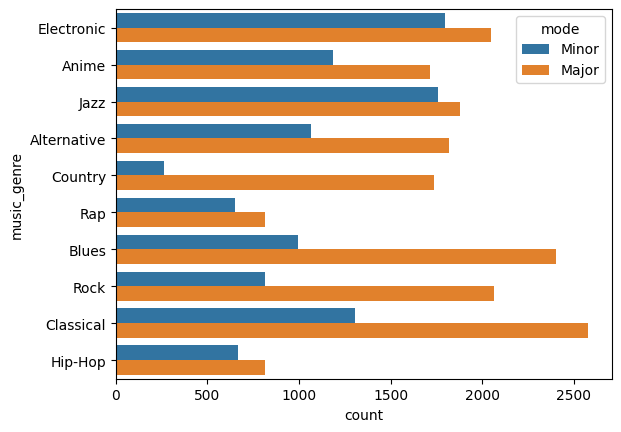

In [ ]:
sns.countplot(y = music['music_genre'],hue = music['mode'])



<Axes: xlabel='count', ylabel='music_genre'>

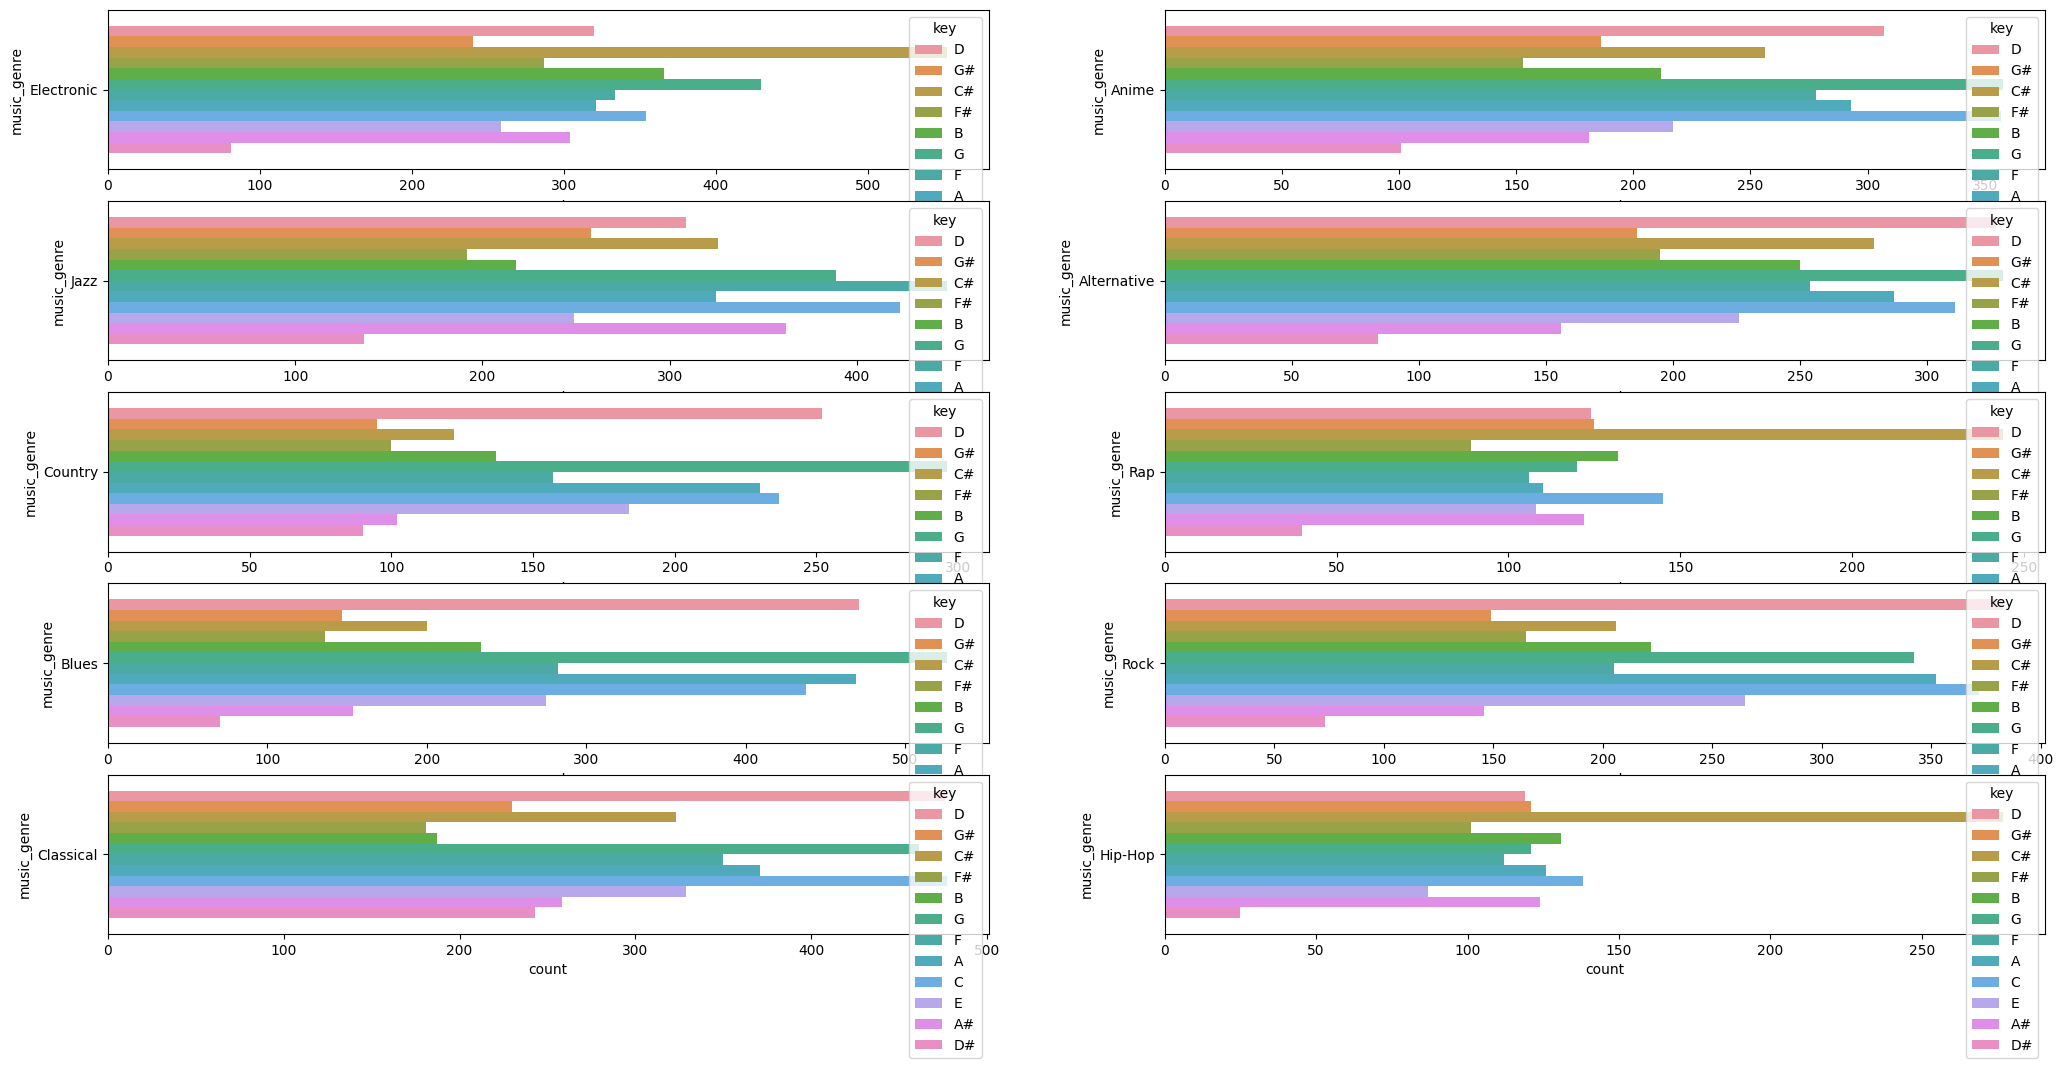

In [ ]:
#plt.figure(figsize=(15, 8))sns.countplot(y = music['music_genre'] == 'Electronic',hue = music['key'], ax=ax[0,0])
fig, ax = plt.subplots(5,2,figsize=(25, 12))
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Electronic'],hue = music['key'], ax=ax[0,0])
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Anime'],hue = music['key'], ax=ax[0,1])
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Jazz'],hue = music['key'], ax=ax[1,0])
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Alternative'],hue = music['key'], ax=ax[1,1])
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Country'],hue = music['key'], ax=ax[2,0])
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Rap'],hue = music['key'], ax=ax[2,1])
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Blues'],hue = music['key'], ax=ax[3,0])
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Rock'],hue = music['key'], ax=ax[3,1])
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Classical'],hue = music['key'], ax=ax[4,0])
sns.countplot(y = music['music_genre'][music['music_genre'] == 'Hip-Hop'],hue = music['key'], ax=ax[4,1])

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'valence']
fig = px.bar(music, x='music_genre', y=sound_features,barmode='group')
fig.show()

In [ ]:
temp = music[['artist_name','music_genre']]
temp.groupby('artist_name').count().sort_values(['music_genre'],ascending=False)

,music_genre
artist_name,
empty_field,1394
Nobuo Uematsu,346
Wolfgang Amadeus Mozart,299
Ludwig van Beethoven,253
Johann Sebastian Bach,248
...,...
Jim Capaldi,1
Beirut,1
Jidenna,1


<Axes: xlabel='music_genre'>

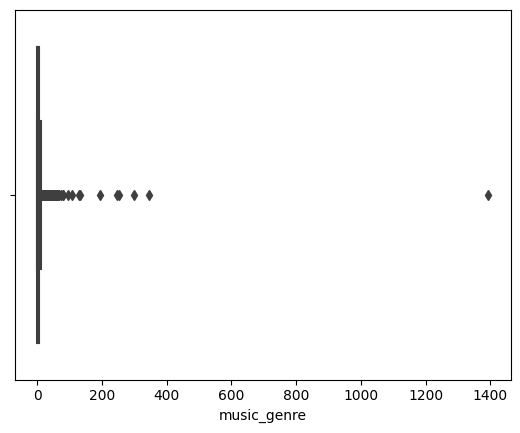

In [ ]:
sns.boxplot(x=temp.groupby('artist_name').count().sort_values(['music_genre'],ascending=False)['music_genre'])

In [ ]:
temp2 = temp.groupby('artist_name').nunique().sort_values(['music_genre'],ascending=False)
temp2

,music_genre
artist_name,
empty_field,10
Artifacts,4
Digable Planets,4
Taj Mahal,4
A Tribe Called Quest,4
...,...
Hitomi Shimatani,1
History of Colour,1
Hiroyuki Sawano,1


<Axes: xlabel='music_genre'>

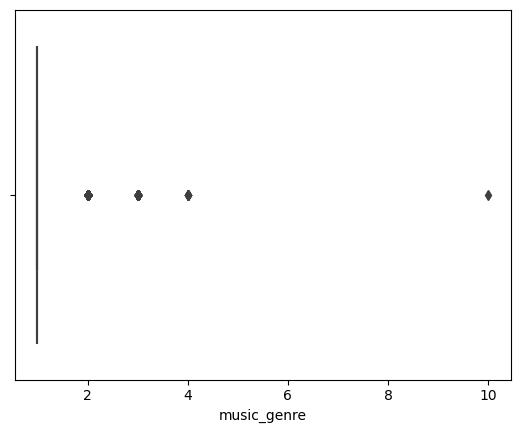

In [ ]:
sns.boxplot(x=temp2['music_genre'])

In [ ]:
music.music_genre.nunique()

10

In [ ]:
temp = music[['track_name','music_genre']]
temp.groupby('track_name').count().sort_values(['music_genre'],ascending=False)

,music_genre
track_name,
Summertime,11
Home,11
I Don't Know,10
Without You,10
Forever,9
...,...
Hood Cycle (Bonus),1
Hoochie Coochie Man - Live,1
Hoochie Coochie Man,1


<Axes: xlabel='music_genre'>

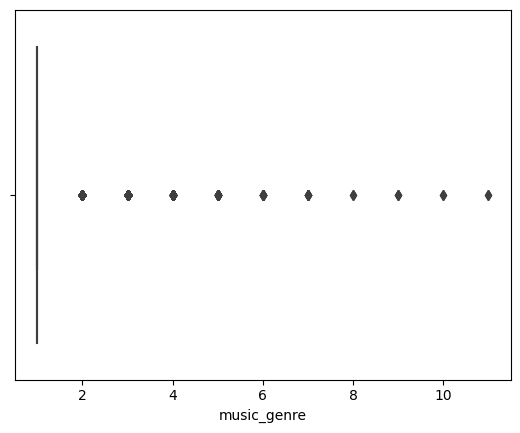

In [ ]:
sns.boxplot(x=temp.groupby('track_name').count().sort_values(['music_genre'],ascending=False)['music_genre'])

In [ ]:
temp = music[['track_name','music_genre']]
temp.groupby('track_name').nunique().sort_values(['music_genre'],ascending=False)

,music_genre
track_name,
Home,8
Wake Up,6
Call Me,6
Without You,6
One,6
...,...
Hommage,1
Homiesexual,1
Homies,1


<Axes: >

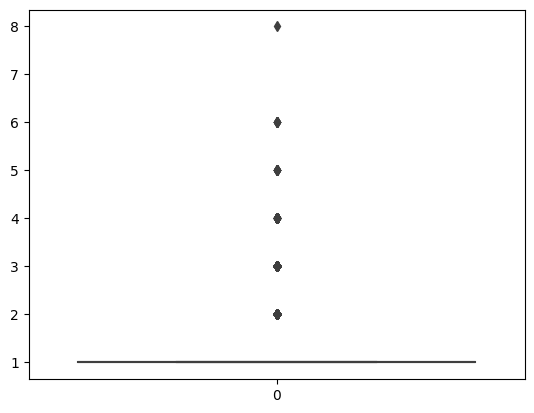

In [ ]:
sns.boxplot(temp.groupby('track_name').nunique().sort_values(['music_genre'],ascending=False)['music_genre'])

In [ ]:
music.drop(music[(music['artist_name'] == 'empty_field')].index, inplace = True)
music.drop(columns='instance_id',inplace = True)
music.drop(columns='track_name',inplace = True)
music.drop(columns='popularity',inplace = True)
le = preprocessing.LabelEncoder()
le.fit(music['key'])
music['key_encoded'] = le.transform(music['key'])
print(music['key_encoded'])

1         5
2        11
3         4
4         9
6         2
         ..
49988     0
49992     0
49995     3
49996     3
49999     3
Name: key_encoded, Length: 26991, dtype: int64


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(music['music_genre'])

# Transform the 'genres' column using the LabelEncoder
music['genres_encoded'] = le.transform(music['music_genre'])
music

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,key_encoded,genres_encoded
1,Thievery Corporation,0.012700,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic,5,5
2,Dillon Francis,0.003060,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic,11,5
3,Dubloadz,0.025400,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic,4,5
4,What So Not,0.004650,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic,9,5
6,Jordan Comolli,0.028900,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,Kid Cudi,0.195000,0.630,260573.0,0.774,0.098500,A,0.111,-6.217,Major,0.1200,158.006,0.446,Hip-Hop,0,6
49992,Ghostemane,0.039100,0.829,127128.0,0.590,0.010700,A,0.114,-7.818,Minor,0.2630,112.97,0.332,Hip-Hop,0,6
49995,Too $hort,0.000577,0.937,278707.0,0.695,0.000032,C,0.295,-6.932,Major,0.1340,99.997,0.457,Hip-Hop,3,6
49996,Unknown Mortal Orchestra,0.036300,0.829,230147.0,0.435,0.878000,C,0.119,-10.136,Major,0.0515,103.816,0.594,Hip-Hop,3,6


In [ ]:
mode_dummies = pd.get_dummies(music['mode'], prefix='mode')

music_new = pd.concat([music, mode_dummies], axis=1)
music_new

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,key_encoded,genres_encoded,mode_Major,mode_Minor
1,Thievery Corporation,0.012700,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic,5,5,0,1
2,Dillon Francis,0.003060,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic,11,5,1,0
3,Dubloadz,0.025400,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic,4,5,1,0
4,What So Not,0.004650,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic,9,5,1,0
6,Jordan Comolli,0.028900,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic,2,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,Kid Cudi,0.195000,0.630,260573.0,0.774,0.098500,A,0.111,-6.217,Major,0.1200,158.006,0.446,Hip-Hop,0,6,1,0
49992,Ghostemane,0.039100,0.829,127128.0,0.590,0.010700,A,0.114,-7.818,Minor,0.2630,112.97,0.332,Hip-Hop,0,6,0,1
49995,Too $hort,0.000577,0.937,278707.0,0.695,0.000032,C,0.295,-6.932,Major,0.1340,99.997,0.457,Hip-Hop,3,6,1,0
49996,Unknown Mortal Orchestra,0.036300,0.829,230147.0,0.435,0.878000,C,0.119,-10.136,Major,0.0515,103.816,0.594,Hip-Hop,3,6,1,0


In [ ]:
music_new.drop(columns=['key','mode','mode_Minor','music_genre'],inplace = True)
music_new

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_encoded,genres_encoded,mode_Major
1,Thievery Corporation,0.012700,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.002,0.531,5,5,0
2,Dillon Francis,0.003060,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,0.333,11,5,1
3,Dubloadz,0.025400,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,0.270,4,5,1
4,What So Not,0.004650,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,0.323,9,5,1
6,Jordan Comolli,0.028900,0.572,214408.0,0.803,0.000008,0.106,-4.294,0.3510,149.995,0.230,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,Kid Cudi,0.195000,0.630,260573.0,0.774,0.098500,0.111,-6.217,0.1200,158.006,0.446,0,6,1
49992,Ghostemane,0.039100,0.829,127128.0,0.590,0.010700,0.114,-7.818,0.2630,112.97,0.332,0,6,0
49995,Too $hort,0.000577,0.937,278707.0,0.695,0.000032,0.295,-6.932,0.1340,99.997,0.457,3,6,1
49996,Unknown Mortal Orchestra,0.036300,0.829,230147.0,0.435,0.878000,0.119,-10.136,0.0515,103.816,0.594,3,6,1


In [ ]:
scaler = StandardScaler()
num_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
music_new[num_columns] = scaler.fit_transform(music_new[num_columns])
music_new

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_encoded,genres_encoded,mode_Major
1,Thievery Corporation,-0.903304,0.492295,-0.303210,1.119519,1.904867,-0.407672,0.466268,-0.575466,-0.119890,0.385118,5,5,0
2,Dillon Francis,-0.929529,0.481389,-0.324778,0.644828,-0.683957,2.080640,0.826383,-0.519624,0.304743,-0.392397,11,5,1
3,Dubloadz,-0.868755,1.321208,-0.717000,0.451436,-0.709536,-0.207394,0.844048,2.018051,0.305397,-0.639789,4,5,1
4,What So Not,-0.925204,0.579549,-0.270408,0.054102,1.791733,-0.207394,0.581606,-0.435242,0.861748,-0.431666,9,5,1
6,Jordan Comolli,-0.859233,0.219627,-0.334475,0.813607,-0.716496,-0.516915,0.874329,3.407878,1.023829,-0.796863,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,Kid Cudi,-0.407370,0.535922,0.037041,0.711636,-0.444721,-0.486570,0.588879,0.541360,1.285662,0.051336,0,6,1
49992,Ghostemane,-0.831485,1.621144,-1.036867,0.064651,-0.686992,-0.468363,0.351227,2.315871,-0.186304,-0.396324,0,6,0
49995,Too $hort,-0.936284,2.210108,0.182976,0.433855,-0.716429,0.630136,0.482745,0.715088,-0.610317,0.094532,3,6,1
49996,Unknown Mortal Orchestra,-0.839102,1.621144,-0.207814,-0.480364,1.706193,-0.438018,0.007143,-0.308669,-0.485496,0.632510,3,6,1


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(music_new['artist_name'])

# Transform the 'genres' column using the LabelEncoder
music_new['artist_name'] = le.transform(music_new['artist_name'])
music_new

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_encoded,genres_encoded,mode_Major
1,4780,-0.903304,0.492295,-0.303210,1.119519,1.904867,-0.407672,0.466268,-0.575466,-0.119890,0.385118,5,5,0
2,1224,-0.929529,0.481389,-0.324778,0.644828,-0.683957,2.080640,0.826383,-0.519624,0.304743,-0.392397,11,5,1
3,1312,-0.868755,1.321208,-0.717000,0.451436,-0.709536,-0.207394,0.844048,2.018051,0.305397,-0.639789,4,5,1
4,5082,-0.925204,0.579549,-0.270408,0.054102,1.791733,-0.207394,0.581606,-0.435242,0.861748,-0.431666,9,5,1
6,2364,-0.859233,0.219627,-0.334475,0.813607,-0.716496,-0.516915,0.874329,3.407878,1.023829,-0.796863,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,2561,-0.407370,0.535922,0.037041,0.711636,-0.444721,-0.486570,0.588879,0.541360,1.285662,0.051336,0,6,1
49992,1736,-0.831485,1.621144,-1.036867,0.064651,-0.686992,-0.468363,0.351227,2.315871,-0.186304,-0.396324,0,6,0
49995,4870,-0.936284,2.210108,0.182976,0.433855,-0.716429,0.630136,0.482745,0.715088,-0.610317,0.094532,3,6,1
49996,4967,-0.839102,1.621144,-0.207814,-0.480364,1.706193,-0.438018,0.007143,-0.308669,-0.485496,0.632510,3,6,1


In [ ]:
X = music_new.drop(columns = 'genres_encoded')
y = music_new['genres_encoded']

In [ ]:
X

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_encoded,mode_Major
1,4780,-0.903304,0.492295,-0.303210,1.119519,1.904867,-0.407672,0.466268,-0.575466,-0.119890,0.385118,5,0
2,1224,-0.929529,0.481389,-0.324778,0.644828,-0.683957,2.080640,0.826383,-0.519624,0.304743,-0.392397,11,1
3,1312,-0.868755,1.321208,-0.717000,0.451436,-0.709536,-0.207394,0.844048,2.018051,0.305397,-0.639789,4,1
4,5082,-0.925204,0.579549,-0.270408,0.054102,1.791733,-0.207394,0.581606,-0.435242,0.861748,-0.431666,9,1
6,2364,-0.859233,0.219627,-0.334475,0.813607,-0.716496,-0.516915,0.874329,3.407878,1.023829,-0.796863,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,2561,-0.407370,0.535922,0.037041,0.711636,-0.444721,-0.486570,0.588879,0.541360,1.285662,0.051336,0,1
49992,1736,-0.831485,1.621144,-1.036867,0.064651,-0.686992,-0.468363,0.351227,2.315871,-0.186304,-0.396324,0,0
49995,4870,-0.936284,2.210108,0.182976,0.433855,-0.716429,0.630136,0.482745,0.715088,-0.610317,0.094532,3,1
49996,4967,-0.839102,1.621144,-0.207814,-0.480364,1.706193,-0.438018,0.007143,-0.308669,-0.485496,0.632510,3,1


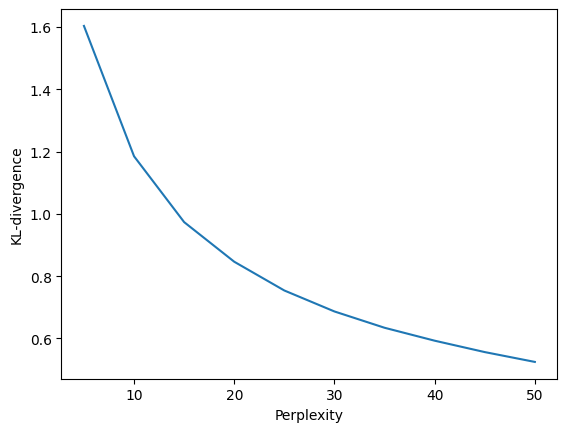

In [ ]:
perplexities = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
kl_divergences = []
for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity)
    tsne_result = tsne.fit_transform(X)
    kl_divergence = tsne.kl_divergence_
    kl_divergences.append(kl_divergence)
plt.plot(perplexities, kl_divergences)
plt.xlabel('Perplexity')
plt.ylabel('KL-divergence')
plt.show()

In [ ]:
train_dataset = pd.DataFrame()

for genre in music_new['genres_encoded'].unique():
    
    full_genre_dataset = music_new[music_new['genres_encoded'] == genre]

    test_genre_dataset = full_genre_dataset.sample(n=500, random_state=42)

    train_genre_dataset = full_genre_dataset.drop(test_genre_dataset.index)
    train_dataset = pd.concat([train_dataset, train_genre_dataset])
    

In [ ]:
test_dataset = music_new.drop(train_dataset.index)
test_dataset

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_encoded,genres_encoded,mode_Major
20,183,-0.915981,-0.085762,-0.113416,1.225005,0.977724,3.701078,0.863048,0.221203,0.861454,-0.396324,0,5,0
26,1514,-0.928006,0.988552,-0.337758,0.887448,0.641084,0.727241,0.402142,-0.440206,0.043531,0.082751,2,5,0
38,119,0.857631,0.399588,-0.106205,-0.058417,1.662044,0.539100,0.077652,-0.513420,1.356685,0.114166,8,5,0
47,4780,-0.780069,1.544796,-0.177668,-0.220163,1.703434,-0.581247,-0.416653,-0.344655,-0.169799,1.327562,0,5,0
48,2349,0.792341,0.481389,0.971848,-0.891763,1.708953,-0.444087,-0.845497,-0.452615,1.036380,-0.914668,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49970,2163,-0.770819,1.146700,-0.351922,0.490114,-0.699327,-0.407672,0.820297,1.993232,1.870611,-0.545545,1,6,1
49975,1063,-0.827676,0.486842,-0.482888,0.852285,-0.708957,0.435926,0.630442,0.963271,1.352992,-0.506276,5,6,1
49980,3632,-0.113563,-0.134842,-0.394816,-0.592883,-0.015642,-0.498708,0.096355,0.739906,0.830698,-0.898961,9,6,0
49983,36,0.629115,-0.407511,0.079774,-0.824954,-0.716492,-0.007115,-0.095132,1.112181,-1.690988,-0.977498,9,6,0


In [ ]:
test_dataset.genres_encoded.value_counts()

5    500
1    500
7    500
0    500
4    500
8    500
2    500
9    500
3    500
6    500
Name: genres_encoded, dtype: int64

In [ ]:
X_train = train_dataset.drop('genres_encoded', axis=1)
y_train = train_dataset['genres_encoded']
X_test = test_dataset.drop('genres_encoded', axis=1)
y_test = test_dataset['genres_encoded']

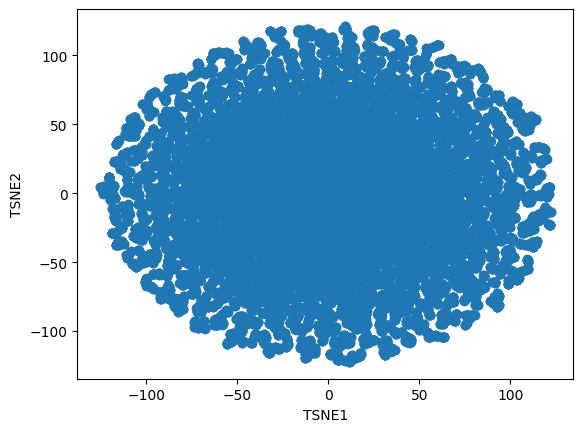

In [ ]:
tsne = TSNE(n_components=2, perplexity=5)
tsne_result = tsne.fit_transform(X_train)

# Plot 2D component
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [ ]:

tsne = TSNE(n_components=3, perplexity=15)
tsne_result = tsne.fit_transform(X_train.iloc[:,1:])


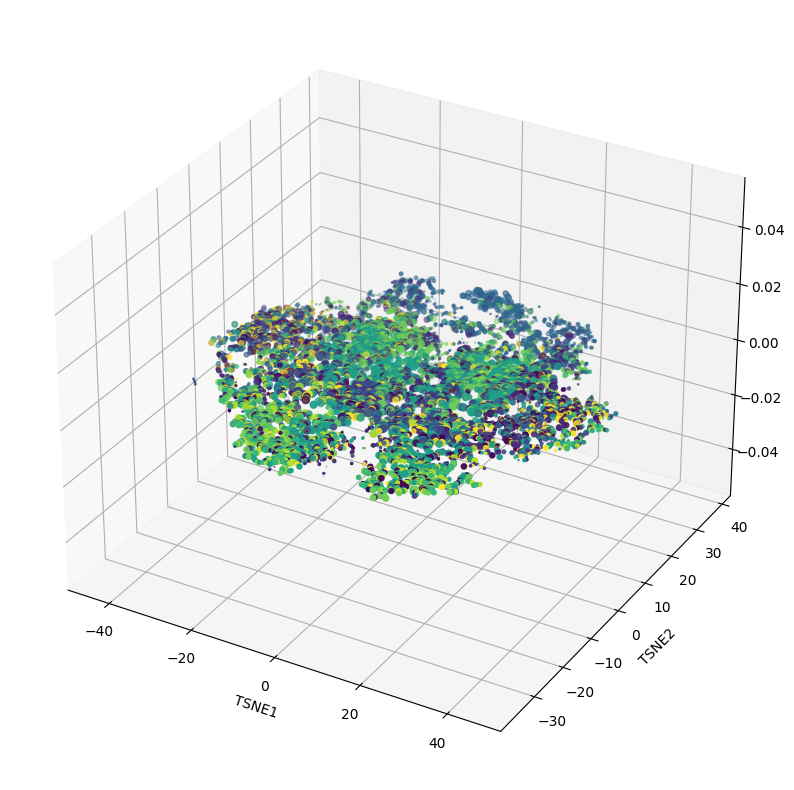

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# assuming you have already computed the t-SNE embedding as `X_tsne`

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(tsne_result[:, 0], tsne_result[:, 1,],tsne_result[:,2], c = y_train)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [ ]:
X_test_transformed = tsne.fit_transform(X_test)
X_test_transformed

array([[-109.40382  ,  -17.76297  ],
       [ -23.789776 ,   -9.3961735],
       [ -99.21672  ,   14.99238  ],
       ...,
       [  22.721148 ,   41.686    ],
       [ -64.399185 ,  -45.537262 ],
       [ -24.910477 ,  -55.160683 ]], dtype=float32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



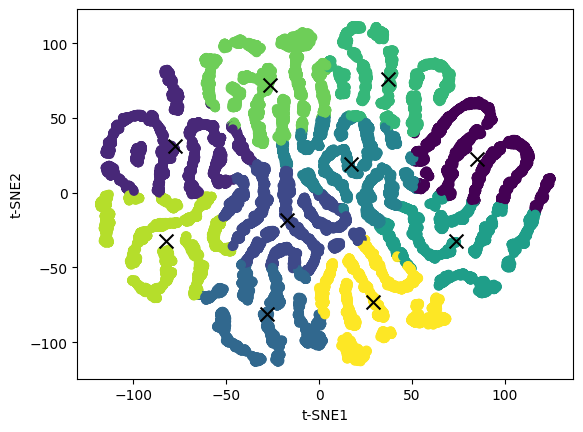

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(tsne_result)
centers = kmeans.cluster_centers_

# Plot clusters
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='black', marker='x')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [ ]:
pca = PCA()
pca.fit(X_train)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
n_eigenvalues_above_1 = np.sum(eigenvalues > 1)
print(f'Number of eigenvalues above 1: {n_eigenvalues_above_1}')

Number of eigenvalues above 1: 4


In [ ]:
X_pca = pca.transform(X_train)
data_pca = pca.transform(X_train)[:, :2]

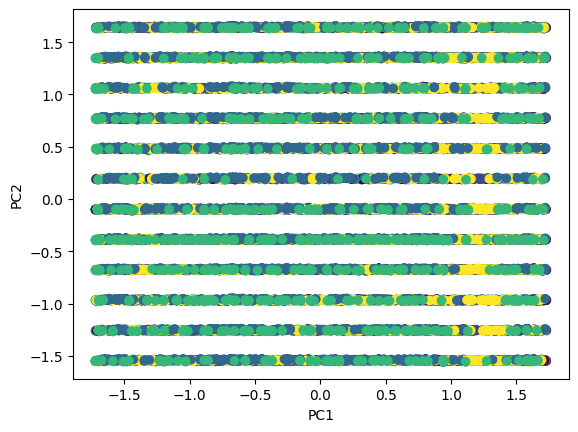

In [ ]:


plt.scatter(data_pca[:, 0], data_pca[:, 1], c = y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

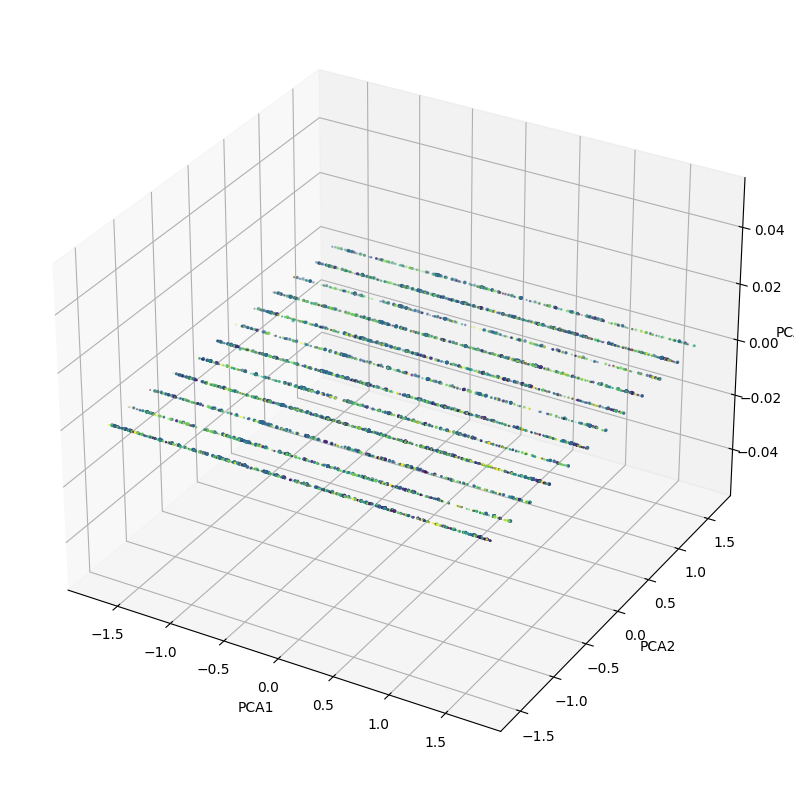

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# assuming you have already computed the t-SNE embedding as `X_tsne`

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_pca[:, 0], X_pca[:, 1,],X_pca[:,2], c = y_train)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

In [ ]:
variance_explained = np.sum(eigenvalues[:1]) / np.sum(eigenvalues) * 100
print(f'Percentage of variance explained by first dimensions: {variance_explained:.2f}%')

Percentage of variance explained by first dimensions: 100.00%


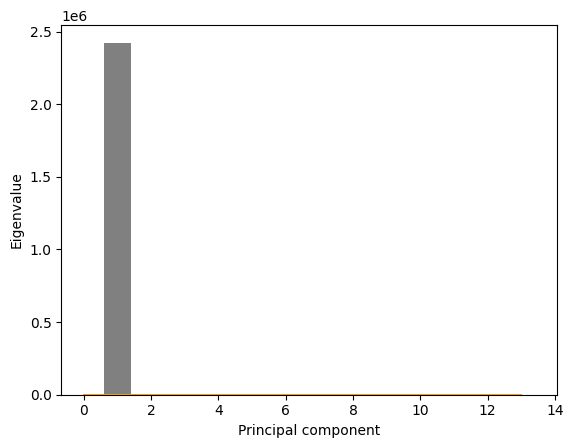

In [ ]:
numClasses = 13
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigenvalues, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

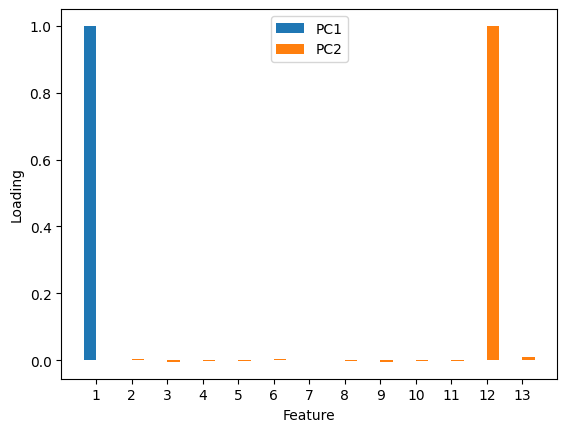

In [ ]:
loadings = pca.components_.T[:, :2]

# Plot the loadings
fig, ax = plt.subplots()
x = np.arange(loadings.shape[0])
width = 0.35
ax.bar(x - width/2, loadings[:, 0], width, label='PC1')
ax.bar(x + width/2, loadings[:, 1], width, label='PC2')
ax.set_xticks(x)
ax.set_xticklabels(np.arange(loadings.shape[0])+1)
ax.set_xlabel('Feature')
ax.set_ylabel('Loading')
ax.legend()
plt.show()



In [ ]:
X_pca_test = pca.transform(X_test)

In [ ]:
clf_tree = DecisionTreeClassifier(criterion="entropy",  random_state=42)
clf_tree.fit(data_pca[:,:1], y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
pred = clf_tree.predict(X_pca_test[:,:1])


In [ ]:
accuracy = accuracy_score(y_test, pred)
auc_score = roc_auc_score(y_test, clf_tree.predict_proba(X_pca_test[:,:1]), multi_class='ovr')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("AUC Score: {:.2f}".format(auc_score))

Accuracy: 74.28%
AUC Score: 0.92


In [ ]:
clf_tree = DecisionTreeClassifier(criterion="entropy",  random_state=42)
clf_tree.fit(X_train, y_train)
pred = clf_tree.predict(X_test)
accuracy = accuracy_score(y_test, pred)
auc_score = roc_auc_score(y_test, clf_tree.predict_proba(X_test), multi_class='ovr')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("AUC Score: {:.2f}".format(auc_score))

Accuracy: 32.70%
AUC Score: 0.63


In [ ]:
X_train

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_encoded,mode_Major
1,4780,-0.903304,0.492295,-0.303210,1.119519,1.904867,-0.407672,0.466268,-0.575466,-0.119890,0.385118,5,0
2,1224,-0.929529,0.481389,-0.324778,0.644828,-0.683957,2.080640,0.826383,-0.519624,0.304743,-0.392397,11,1
3,1312,-0.868755,1.321208,-0.717000,0.451436,-0.709536,-0.207394,0.844048,2.018051,0.305397,-0.639789,4,1
4,5082,-0.925204,0.579549,-0.270408,0.054102,1.791733,-0.207394,0.581606,-0.435242,0.861748,-0.431666,9,1
6,2364,-0.859233,0.219627,-0.334475,0.813607,-0.716496,-0.516915,0.874329,3.407878,1.023829,-0.796863,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,2079,-0.230542,1.904719,-0.464025,0.767896,-0.715902,0.739379,0.655529,2.750192,0.663289,1.358976,1,0
49988,2561,-0.407370,0.535922,0.037041,0.711636,-0.444721,-0.486570,0.588879,0.541360,1.285662,0.051336,0,1
49995,4870,-0.936284,2.210108,0.182976,0.433855,-0.716429,0.630136,0.482745,0.715088,-0.610317,0.094532,3,1
49996,4967,-0.839102,1.621144,-0.207814,-0.480364,1.706193,-0.438018,0.007143,-0.308669,-0.485496,0.632510,3,1


In [ ]:
clf_tree = DecisionTreeClassifier(criterion="entropy",  random_state=42)
clf_tree.fit(X_train.iloc[:,:1], y_train)
pred = clf_tree.predict(X_test.iloc[:,:1])
accuracy = accuracy_score(y_test, pred)
auc_score = roc_auc_score(y_test, clf_tree.predict_proba(X_test.iloc[:,:1]), multi_class='ovr')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("AUC Score: {:.2f}".format(auc_score))

Accuracy: 74.32%
AUC Score: 0.92


In [ ]:
y_test.nunique()
from itertools import cycle
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [ ]:
linshi = clf_tree.predict_proba(X_pca_test[:,:1])[:,1]

In [ ]:

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(10):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test==i, clf_tree.predict_proba(X_pca_test[:,:1])[:, i])#pos_label = i
    roc_auc[i] = auc(fpr[i], tpr[i])


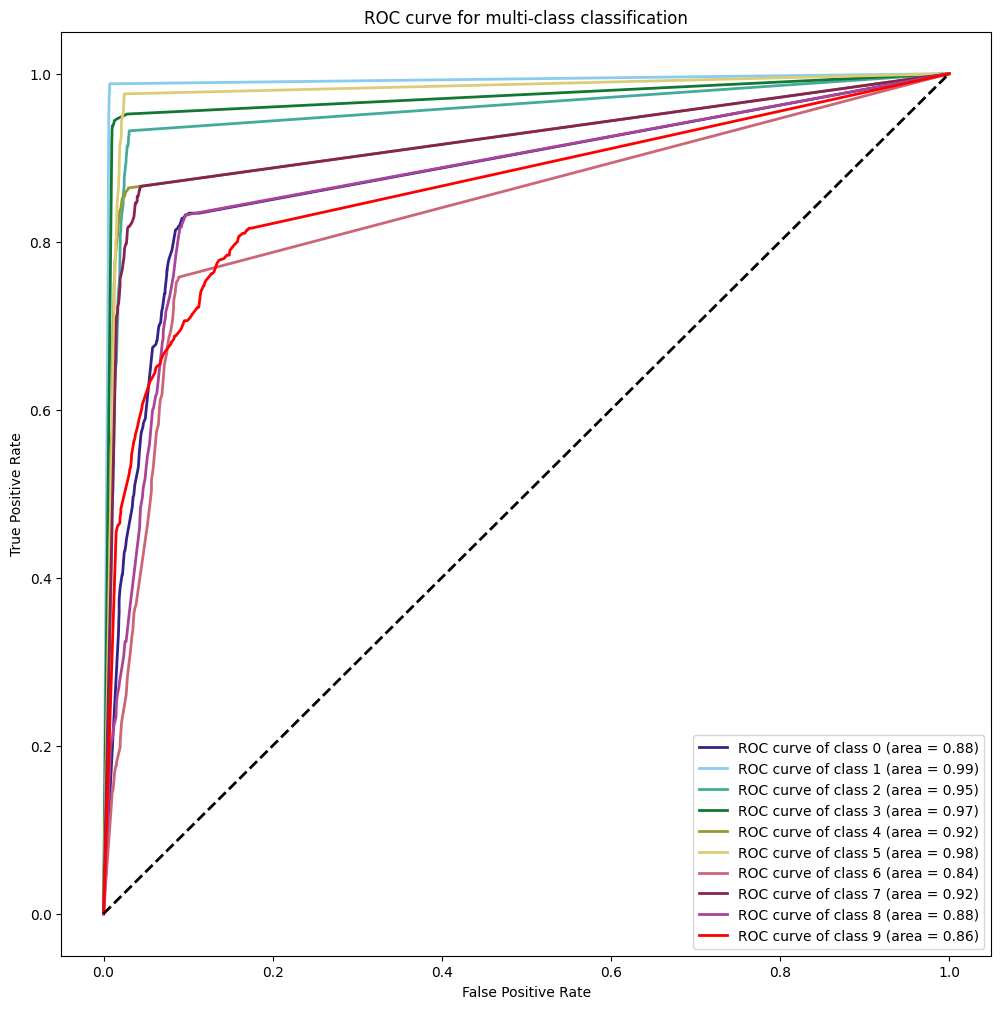

In [ ]:
# plot the ROC AUC curve for each class
plt.figure(figsize=(12,12))
colors = ['#332288', '#88CCEE', '#44AA99','#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499','red']  # add more colors as needed
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))

# add diagonal line and axis labels
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data_pca[:,:1], y_train)
pred = neigh.predict(X_pca_test[:,:1])
accuracy = accuracy_score(y_test, pred)
auc_score = roc_auc_score(y_test, neigh.predict_proba(X_pca_test[:,:1]), multi_class='ovr')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("AUC Score: {:.2f}".format(auc_score))

Accuracy: 67.26%
AUC Score: 0.90


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, pred)
auc_score = roc_auc_score(y_test, neigh.predict_proba(X_test), multi_class='ovr')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("AUC Score: {:.2f}".format(auc_score))

Accuracy: 55.82%
AUC Score: 0.84


In [ ]:
clf = LogisticRegression(random_state=10).fit(X_pca[:,1:], y_train)
pred = clf.predict(X_pca_test[:,1:])
accuracy = accuracy_score(y_test, pred)
auc_score = roc_auc_score(y_test, clf.predict_proba(X_pca_test[:,1:]), multi_class='ovr')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("AUC Score: {:.2f}".format(auc_score))

Accuracy: 38.36%
AUC Score: 0.83


In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
auc_score = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("AUC Score: {:.2f}".format(auc_score))

Accuracy: 29.14%
AUC Score: 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
n_classes = len(np.unique(y_train))
n_estimators = 50  # number of decision trees to use
learning_rate = 1.0  # learning rate of the AdaBoost model

# train an AdaBoost model using decision tree as the base estimator
base_estimator = DecisionTreeClassifier(criterion="entropy",  random_state=42)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate)
ada_boost.fit(X_train, y_train)

# predict the class labels and probabilities for the test data
y_pred = ada_boost.predict(X_test)
y_pred_proba = ada_boost.predict_proba(X_test)

# evaluate the model using accuracy score and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  
print('Accuracy:', accuracy)
print('ROC AUC score:', roc_auc)

Accuracy: 0.323
ROC AUC score: 0.6808361111111111


In [ ]:
n_classes = len(np.unique(y_train))
n_estimators = 50  # number of decision trees to use
learning_rate = 1.0  # learning rate of the AdaBoost model

# train an AdaBoost model using decision tree as the base estimator
base_estimator = DecisionTreeClassifier(criterion="entropy",  random_state=42)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate)
ada_boost.fit(data_pca[:,:1], y_train)

# predict the class labels and probabilities for the test data
y_pred = ada_boost.predict(X_pca_test[:,:1])
y_pred_proba = ada_boost.predict_proba(X_pca_test[:,:1])

# evaluate the model using accuracy score and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  
print('Accuracy:', accuracy)
print('ROC AUC score:', roc_auc)

Accuracy: 0.7428
ROC AUC score: 0.9110642444444444


In [ ]:


rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')

print('Accuracy:', accuracy)
print('ROC AUC:', roc_auc)


Accuracy: 0.442
ROC AUC: 0.8607582444444443


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define the scoring metric to use
scorer = make_scorer(roc_auc_score, multi_class='ovr')
grid_search = GridSearchCV(rf, param_grid=param_grid, scoring=scorer, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_rf.predict(X_test)

# Evaluate accuracy and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test), multi_class='ovr')

print('Best parameters:', best_params)
print('Accuracy:', accuracy)
print('ROC AUC:', roc_auc)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.3548
ROC AUC: 0.8389344888888889


In [ ]:

rf = RandomForestClassifier(max_depth=30, min_samples_leaf= 1, min_samples_split= 2, n_estimators=1000)
rf.fit(X_pca[:,1:], y_train)

# Predict on the test set
y_pred = rf.predict(X_pca_test[:,1:])

# Evaluate accuracy and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_pca_test[:,1:]), multi_class='ovr')

print('Accuracy:', accuracy)
print('ROC AUC:', roc_auc)


Accuracy: 0.3936
ROC AUC: 0.8369783777777778


In [ ]:

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(data_pca[:,:1], y_train)

# Predict on the test set
y_pred = rf.predict(X_pca_test[:,:1])

# Evaluate accuracy and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_pca_test[:,:1]), multi_class='ovr')

print('Accuracy:', accuracy)
print('ROC AUC:', roc_auc)


Accuracy: 0.7406
ROC AUC: 0.9300884222222221


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(10):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test==i, rf.predict_proba(X_pca_test[:,:1])[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


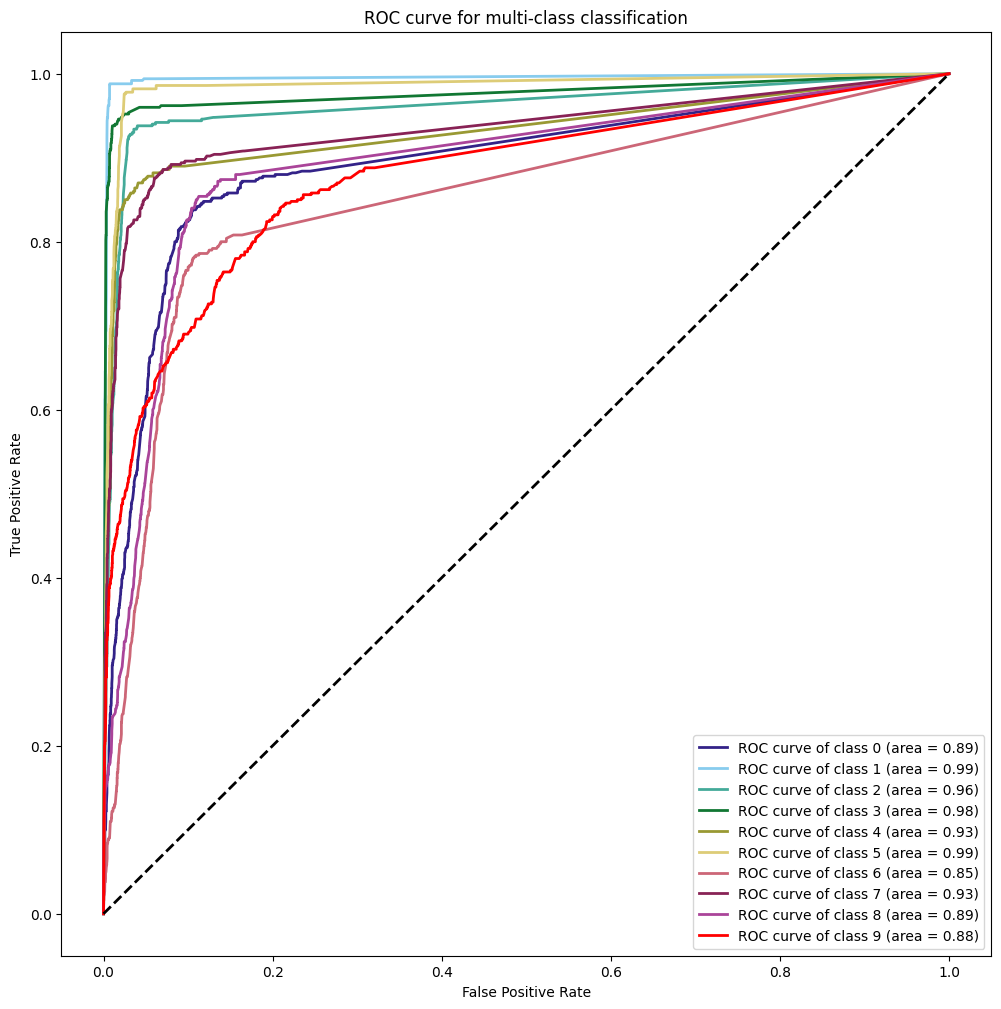

In [ ]:
# plot the ROC AUC curve for each class
plt.figure(figsize=(12,12))
colors = ['#332288', '#88CCEE', '#44AA99','#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499','red'] 
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))

# add diagonal line and axis labels
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()